In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from google.colab.patches import cv2, cv2_imshow

## Histogram Equalization

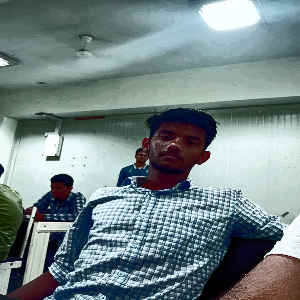

In [2]:
photo = cv.imread('/content/smpimg.jpg')
img_to_yuv = cv.cvtColor(photo,cv.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv.cvtColor(img_to_yuv, cv.COLOR_YUV2BGR)
cv.imwrite('/outputimage1.jpg ',hist_equalization_result)
imS = cv2.resize(hist_equalization_result, (300, 300))     
cv2_imshow(imS)

## Linear Filtering using Convolution

#### Low Pass Filter is more like an averaging process. But with the weights and span of averaging depending on the shape and contents of the kernel.

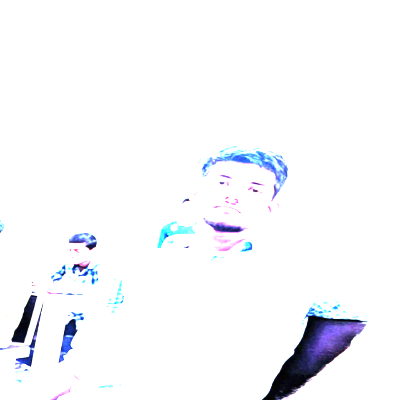

In [3]:
img_src = cv.imread('/content/smpimg.jpg')
#prepare the 5x5 shaped filter
kernel = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]])
kernel = kernel/sum(kernel)
#filter the source image
photo = cv.filter2D(img_src,-1,kernel)

#save result image
cv.imwrite('/outputimage4.jpg',photo)
imS1 = cv2.resize(photo, (400, 400))     
cv2_imshow(imS1)



#### High Pass Filter is like an edge detector. It gives a high when there is a significant change in the adjacent pixel values.

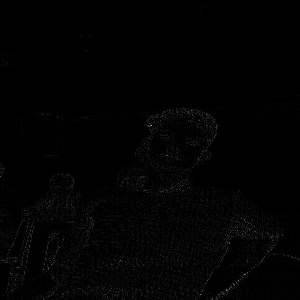

In [4]:
img_src = cv.imread('/content/smpimg.jpg')
#edge detection filter
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 4.0, -1.0],
                   [0.0, -1.0, 0.0]])
kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)
#filter the source image
photo = cv.filter2D(img_src,-1,kernel)
#save result image
cv.imwrite('/outputimage2.jpg',photo)
imS = cv2.resize(photo, (300, 300))     
cv2_imshow(imS)




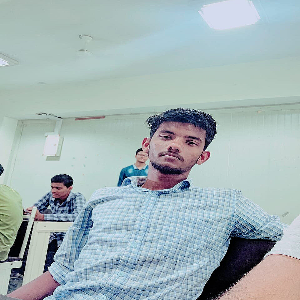

In [5]:

#to save color information with the high frequency pixel areas highlighted.
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 5.0, -1.0],
                   [0.0, -1.0, 0.0]])
kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)
#filter the source image
photo1 = cv.filter2D(img_src,-1,kernel)
#save result image
cv.imwrite('/outputimage3.jpg',photo1)
imS1 = cv2.resize(photo1, (300, 300))     
cv2_imshow(imS1)